Deep Q Network (DQN)

In [1]:
import numpy as np
from DQN_agent import DQN_agent
from utils import make_env, plot_learning_curve

c:\Users\rober\anaconda3\envs\learn_RL\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Create environment
env = make_env('PongNoFrameskip-v4')
best_score = -np.inf
load_checkpoint = False
n_games = 300

In [3]:
# Create agent
agent = DQN_agent(gamma=0.99, epsilon=1.0, lr=0.0001,input_dims=(env.observation_space.shape),
                    n_actions=env.action_space.n, mem_size=30000, eps_min=0.1,
                    batch_size=32,replace=1000,eps_dec=1e-5,chkpt_dir='models/',algo='DQNagent',
                    env_name='PongNoFrameskip-v4')
    
if load_checkpoint:
    agent.load_models()

fname = agent.algo + '_' + agent.env_name + '_lr' + str(agent.lr) + '_' + str(n_games) + 'games'
figure_file = 'plots/' + fname + '.png'

In [4]:
# Train
n_steps = 0
scores, eps_history, steps_array = [], [], []

for i in range(n_games):
    done, trunc = False, False
    score = 0
    observation, info = env.reset()

    while not (done or trunc):
        action = agent.choose_action(observation)
        observation_, reward, done, trunc, info = env.step(action)
        score += reward
        terminal = done or trunc
        if not load_checkpoint:
            agent.store_transition(observation,action,reward, observation_,int(terminal))
            agent.learn()
        observation = observation_
        n_steps += 1

    scores.append(score)
    steps_array.append(n_steps)
    eps_history.append(agent.epsilon)

    avg_score = np.mean(scores[-50:])
    print(f'Episode {i}, score {score}, average score{avg_score:.01f}, best score {best_score:.01f}, epsilon {agent.epsilon:.02f}, steps {n_steps}')
        
    if avg_score > best_score:
        if not load_checkpoint:
            agent.save_models()
        best_score = avg_score

c:\Users\rober\anaconda3\envs\learn_RL\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 0, score -21.0, average score-21.0, best score -inf, epsilon 0.99, steps 940
...Saving checkpoint...
...Saving checkpoint...
Episode 1, score -21.0, average score-21.0, best score -21.0, epsilon 0.98, steps 1884
Episode 2, score -20.0, average score-20.7, best score -21.0, epsilon 0.97, steps 2927
...Saving checkpoint...
...Saving checkpoint...
Episode 3, score -21.0, average score-20.8, best score -20.7, epsilon 0.96, steps 3691
Episode 4, score -21.0, average score-20.8, best score -20.7, epsilon 0.95, steps 4633
Episode 5, score -20.0, average score-20.7, best score -20.7, epsilon 0.94, steps 5532
Episode 6, score -21.0, average score-20.7, best score -20.7, epsilon 0.94, steps 6325
Episode 7, score -19.0, average score-20.5, best score -20.7, epsilon 0.93, steps 7508
...Saving checkpoint...
...Saving checkpoint...
Episode 8, score -21.0, average score-20.6, best score -20.5, epsilon 0.91, steps 8574
Episode 9, score -21.0, average score-20.6, best score -20.5, epsilon 0.91,

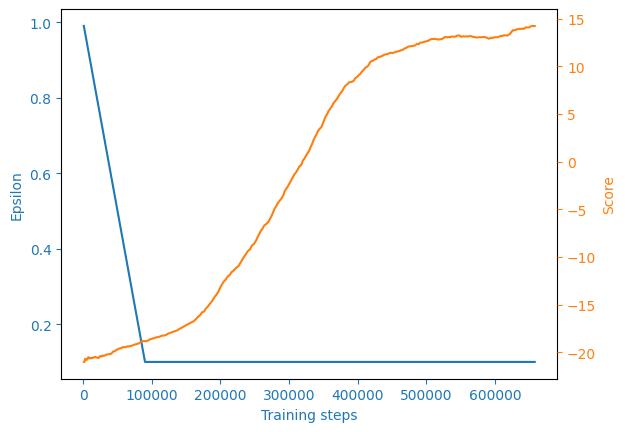

In [5]:
plot_learning_curve(steps_array,scores,eps_history,figure_file)